# Project: No Show Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing data associated with the no-show medical appointments in Brazil.
In particular, we'll be interested in discovering trends of whether or not patients show up for their appointment.
Here is a brief description about the dataset:
This dataset collects information from 100k medical appointments in Brazil.
This dataset columns:
<ul>
    <li>‘Gender’ Male or Female </li>
    <li>‘ScheduledDay’ the day of the actuall appointment, when they have to visit the doctor.</li>
    <li>‘AppointmentDay’ the day someone called or registered the appointment, this is before appointment of course.</li>
    <li>‘Age’ age of patient.</li>
    <li>‘Neighborhood’ indicates the location of the hospital.</li>
    <li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li>‘SMS_received’ number of messages sent to the patient.</li>
    <li>‘No-show’ whether the patient showed up or not </li>
</ul>
Questions I am looking to explore and answer in my report:
<ol>
<li>Is there a gender that is more likely to show up than the other?(If there is any correlation present)</li>
<li>Do people who do not recieve an SMS more likely to not show up?</li>
<li>Do people enrolled in the scholarship have less no-show rates than people who are not?</li>
<li>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</li>
<li>What factors show the strongest correlation with no-show patients?</li>
<li>What factor do most no-show patients seem to share?</li>
</ol>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')#load dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape #check dataset shape(rows, columns)

(110527, 14)

we have 110,527 patients in this dataset

In [7]:
df.info() #check null values and dtype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**'ScheduledDay'**, **'AppointmentDay'** stored as strings (should be datetime).  
**'Age'** stored as int values.  
**'Neighbourhood'** stored as strings.  
**'Scholarship'**, **'Hipertension'**, **'Diabetes'**, **'Alcoholism'**, and **'Handcap'** stored as int values.  
**'SMS_received'** stored as int values.  
**'No-show'** stored as strings.  

In [8]:
sum(df.duplicated())

0

This dataset does not contain any **NAN** values nor any **duplicated** rows.  
I won't need the **Patient id** or **Appointment id** while exploring this dataset so I will **drop** them; I only needed them to check for duplicates.

In [9]:
df.drop(columns=['PatientId','AppointmentID'],inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now let's check each column's possible values and their counts

In [10]:
for col in df.columns:
    print(df[col].value_counts(),'\n')#check each columns values and their counts

F    71840
M    38687
Name: Gender, dtype: int64 

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-03T08:09:36Z     1
2016-05-18T07:16:59Z     1
2016-05-19T09:03:31Z     1
2016-05-09T18:18:57Z     1
2016-05-17T12:08:43Z     1
Name: ScheduledDay, Length: 103549, dtype: int64 

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z 

**Age** column has incorrect values for age ( **0** and **-1** ).  
**Handcap** column contains values from **0 to 4**.  

Let's check the **-1** age row.

Let's see statistical information about each column in this dataset

In [11]:
df.query('Handcap > 1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Only about 9.8% of the patient had a Scholarship.  
Majority of patients' ages are between 18 to 60 years old.
Majority of the patients (approximately 68%) didn't recieve an SMS.
A big portion of the patients suffer from Hypertension compared to Diabetes, and Alcoholism.  
Most of the patients aren't handicapped.  
The oldest patient is 115.  
Mean age is 37.  

### Data Cleaning 

**Columns to clean**:<ul>
    <li><b>‘Age’</b> : <ol>
        <li>drop -1 age row</li>
        <li>replace 0 age rows with the mean age</li>
        </ol> </li>
    <li><b>‘Handcap’</b> : replace rows with values > 1 with 1</li>
    <li><b>Changing column names</b>:<ol> <li>‘Handcap’ to ‘Handicap’</li>
        <li>‘Hipertension’ to ‘Hypertension’</li>
        </ol></li>
</ul>
I chose to drop the -1 age row as it's probably invalid and it won't affect my dataset or my conclusions.
Handcap rows with values > 1 should be changed to 1 as Handcap only takes values of 1 or 0.  

The dataset doesn't contain any NAN values nor duplicated rows, so it is overall relatively clean.

Let's start by dropping the -1 age value row

In [13]:
df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df.drop(99832,inplace=True)
df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now let's replace 0 age value rows with the mean

In [15]:
mean_age = df['Age'].mean()
mean_age = int(mean_age) #convert mean age to int
df['Age'].replace(0,mean_age,inplace=True) #replace all 0 with mean age
df['Age'].describe() # check 

count    110526.000000
mean         38.273945
std          22.104819
min           1.000000
25%          20.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Now, the youngest patient is 1 year old.
The **Age** column is now clean, let's clean the **Handcap** column.  
Let's drop all the wrong values.

In [16]:
df['Handcap'].replace([2,3,4],1,inplace=True) #replace all Handcap values > 1
df['Handcap'].value_counts() #check

0    108285
1      2241
Name: Handcap, dtype: int64

Let's change the column names

In [156]:
df.rename(columns={"Handcap": "Handicap", "Hipertension": "Hypertension"},inplace=True)

Let's check the Dataframe after cleaning it

In [157]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow_num,count
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,102.000000
mean,38.273945,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934,1083.588235
std,22.104819,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445,699.144093
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541.750000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1337.500000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1482.500000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5072.000000


The DataFrame is now clean

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will look at our questions we intially posed and try graphing the relationships between variables to help us answer our questions and see trends among our data more clearly.

### Graph of all variables

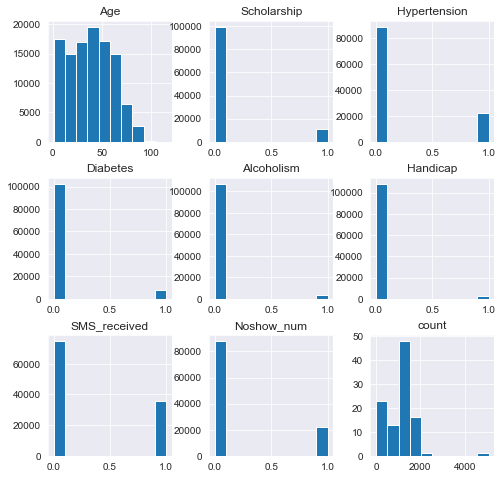

In [158]:
df.hist(figsize=(8,8));

### Graphing Number of patients with and without Scholarship

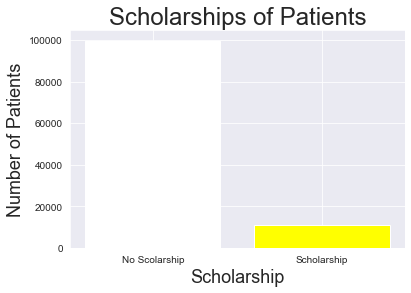

In [159]:
labels_sco = ['No Scolarship','Scholarship']
heights_sco = [df['Scholarship'].value_counts()[0],df['Scholarship'].value_counts()[1]]
plt.bar(labels_sco,heights_sco,color=['white','yellow'])
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Number of Patients',fontsize=18)
plt.title('Scholarships of Patients',fontsize=24);

### Graphing Ages of Patients

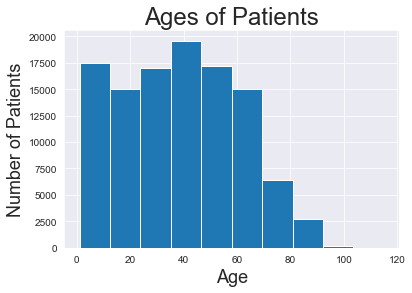

In [160]:
df['Age'].hist()
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Patients',fontsize=18);
plt.title('Ages of Patients',fontsize=24);

### Graphing Gender of Patients

In [161]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

As we can see from the previous histogram, the ages of the patient are skewed to the right.

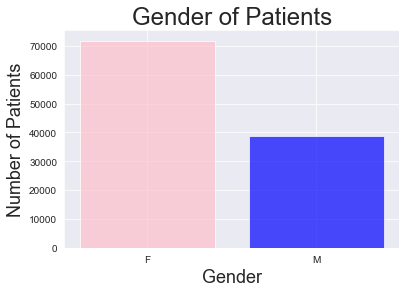

In [162]:
labels = ['F','M']
heights = [df['Gender'].value_counts()[0],df['Gender'].value_counts()[1]]
plt.bar([0,1],heights,color=['pink','blue'],alpha=0.7,tick_label=labels)
plt.title('Gender of Patients',fontsize=24)
plt.xlabel('Gender',fontsize=18)
plt.ylabel('Number of Patients',fontsize=18);

### Research Question 1: Is there a Gender that is more likely to show up than the other?(If there is any correlation present)

In [32]:
gender_counts = df.groupby('Gender')['No-show'].value_counts()
gender_counts

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [33]:
# get total counts for each gender
totals = df.groupby('Gender')['No-show'].count()
totals

Gender
F    71839
M    38687
Name: No-show, dtype: int64

In [34]:
f_proportion = gender_counts['F'] / totals['F']
f_proportion

No-show
No     0.796851
Yes    0.203149
Name: No-show, dtype: float64

In [35]:
m_proportion = gender_counts['M'] / totals['M']
m_proportion

No-show
No     0.800321
Yes    0.199679
Name: No-show, dtype: float64

Here is a Pie chart showing the percentages of patients who didn't show up according to gender to further answer our question

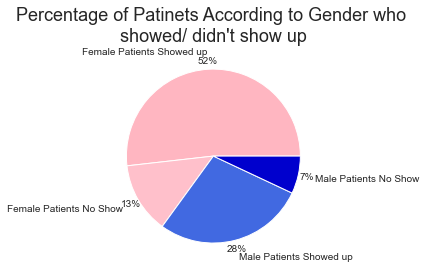

In [146]:
df.groupby('Gender')['No-show'].value_counts()
labels_gender = ["Female Patients Showed up","Female Patients No Show","Male Patients Showed up","Male Patients No Show"]
plt.pie(counts_gender, labels=labels_gender, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=1, colors=['lightpink','pink','royalblue','mediumblue'])
plt.title("Percentage of Patinets According to Gender who \nshowed/ didn't show up",fontsize=18);

In [36]:
ind = np.arange(len(m_proportion))  # the x locations for the groups
width = 0.35       # the width of the bars

In this dataset, female patients outnumber their male counterparts.  
We use the proportions of both genders and graph them accordingly to further show the true relationship.

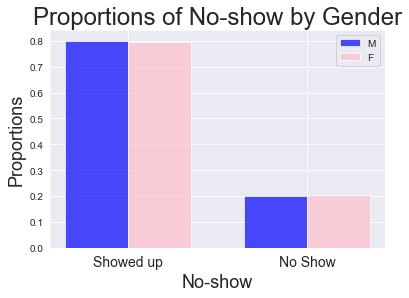

In [144]:
# plot bars
m_bars = plt.bar(ind, m_proportion, width, color='b', alpha=.7, label='M')
f_bars = plt.bar(ind + width, f_proportion, width, color='pink', alpha=.7, label='F')

# title and labels
plt.ylabel('Proportions',fontsize=18)
plt.xlabel('No-show',fontsize=18)
plt.title('Proportions of No-show by Gender',fontsize=24)
labels = ['Showed up', 'No Show']  # xtick labels
locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels, fontsize =14)

# legend
plt.legend();

Both Males and Females have approximately equal Show and No Show proportions.  
They both do not show up to approximately 80% of their appointments, while show up to about 20% of their appointments.  
No, there isn't a Gender that is more likely to show up than the other Gender; they both have approximately equal chances.

### Do people who recieved an SMS more likely to show up?

In [38]:
sms_counts = df.groupby('SMS_received')['No-show'].value_counts()
sms_counts

SMS_received  No-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [39]:
sms_totals = df.groupby('SMS_received')['No-show'].count()
sms_totals

SMS_received
0    75044
1    35482
Name: No-show, dtype: int64

In [40]:
no_sms = sms_counts[0]/sms_totals[0]
no_sms

No-show
No     0.832965
Yes    0.167035
Name: No-show, dtype: float64

In [41]:
yes_sms = sms_counts[1]/sms_totals[1]
yes_sms

No-show
No     0.724255
Yes    0.275745
Name: No-show, dtype: float64

In [42]:
ind_sms = np.arange(0,len(yes_sms))

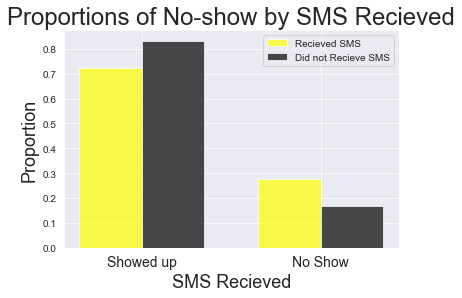

In [147]:
# plot bars
yes_bar = plt.bar(ind_sms,yes_sms,width,color='yellow',alpha=.7,label='Recieved SMS')
no_bar = plt.bar(ind_sms+width,no_sms,width,color='black',alpha=.7,label='Did not Recieve SMS')

# title and labels
plt.xlabel('SMS Recieved',fontsize=18)
plt.ylabel('Proportion',fontsize=18)
plt.title('Proportions of No-show by SMS Recieved',fontsize=24)
labels = ['Showed up','No Show']
locations = ind_sms+width/2
plt.xticks(locations,labels,fontsize=14)

#legend
plt.legend();

People who recieved an SMS were less likely to show up to their appointments than the people who did not.  
It appears that sending an SMS increases the chances of a patient not showing by about 10%, while patients who didn't recieve any SMS showed up to 83% appointments compared to the 72% of the people who recieved any SMS.

### Do people enrolled in the scholarship have less no-show rates than people who are not?

In [44]:
sco_counts = df.groupby('Scholarship')['No-show'].value_counts()
sco_counts

Scholarship  No-show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

In [45]:
sco_totals = df.groupby('Scholarship')['No-show'].count()
sco_totals

Scholarship
0    99665
1    10861
Name: No-show, dtype: int64

In [46]:
sco_n = sco_counts[0] / sco_totals[0]
sco_n

No-show
No     0.801926
Yes    0.198074
Name: No-show, dtype: float64

In [47]:
sco_y = sco_counts[1] / sco_totals[1]
sco_y

No-show
No     0.762637
Yes    0.237363
Name: No-show, dtype: float64

Here is a Pie chart showing the percentages of patients who didn't show up according to scholarship to further answer our question

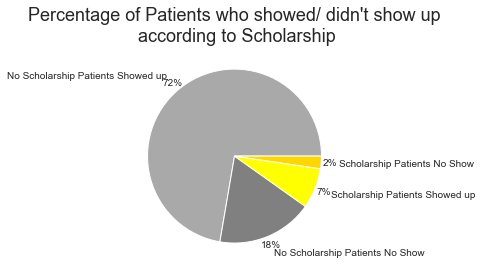

In [152]:
counts_sco = df.groupby('Scholarship')['No-show'].value_counts()
labels_sco = ["No Scholarship Patients Showed up","No Scholarship Patients No Show","Scholarship Patients Showed up","Scholarship Patients No Show"]
plt.pie(counts_sco, labels=labels_sco, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=1, colors=['darkgrey','grey','yellow','gold'])
plt.title("Percentage of Patients who showed/ didn't show up\n according to Scholarship",fontsize=18);

In [48]:
ind_sco = np.arange(0,len(sco_y))

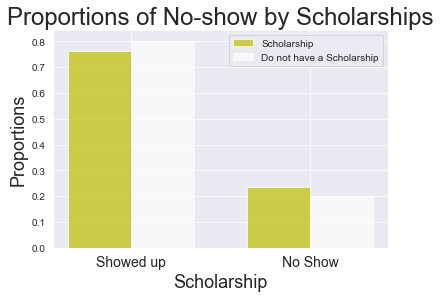

In [153]:
# plot bars
sco_y_bar = plt.bar(ind_sco,sco_y,width,color='y',alpha=.7,label='Scholarship')
sco_n_bar = plt.bar(ind_sco+width,sco_n,width,color='w',alpha=.7,label='Do not have a Scholarship')

# title and labels
plt.xlabel('Scholarship',fontsize=18)
plt.ylabel('Proportions',fontsize=18)
plt.title('Proportions of No-show by Scholarships',fontsize=24)
labels = ['Showed up','No Show']
locations = ind_sco+width/2
plt.xticks(locations,labels,fontsize=14)

#legend
plt.legend();

Patients with Scholarships showed up less than those who don't have a Scholarship by close to 4%.

### What factors show the strongest correlation with no-show patients?

In [50]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,38.273945,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,22.104819,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


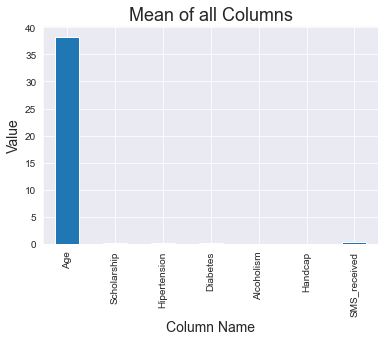

In [52]:
df.mean(axis=0).plot(kind='bar')
plt.title('Mean of all Columns',fontsize=18)
plt.xlabel('Column Name',fontsize=14)
plt.ylabel('Value',fontsize=14);

In [163]:
df['Noshow_num'] = df['No-show'].replace({'Yes':1,'No':0})

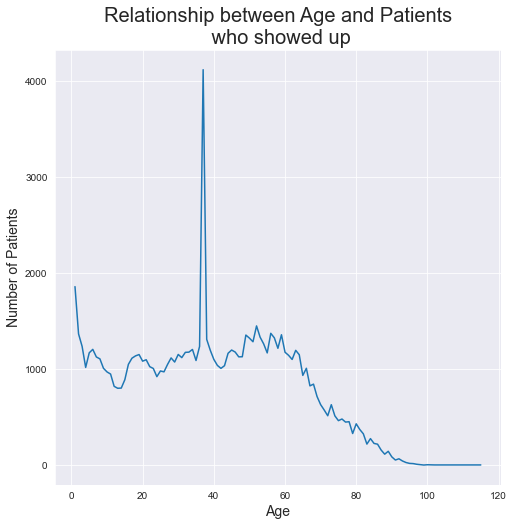

In [165]:
df.groupby(['No-show','Age'])['No-show'].count()['No'].plot(figsize=(8,8))
plt.ylabel('Number of Patients',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.title("Relationship between Age and Patients\n who showed up",fontsize=20);

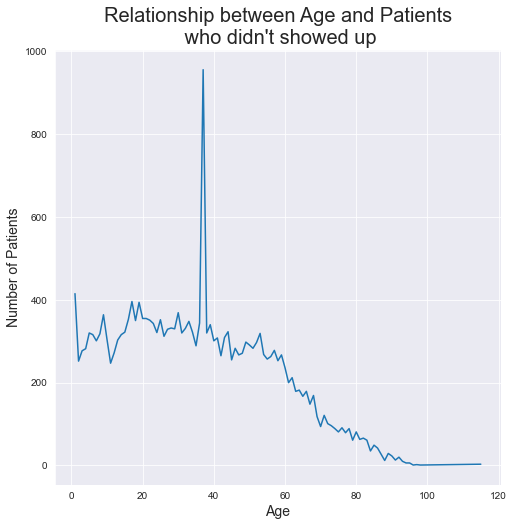

In [167]:
df.groupby(['No-show','Age'])['No-show'].count()['Yes'].plot(figsize=(8,8))
plt.ylabel('Number of Patients',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.title("Relationship between Age and Patients\n who didn't showed up",fontsize=20);

We could conclude from the previous graphs that most of our patients who either show or don't show up peak at 37 in both graphs.  

There's a downward trend after that intial peak.

<a id='conclusions'></a>
## Conclusions


There **doesn't** seem to be a variable that **strongly** correlates with whether or not our patient would **show-up**, but there seems to be several vairiables that could help us *predict* so by a *slight margin*.

Most of the Patients studied in this dataset were in the age range of 20-55, with a mean of 37.  
The youngest patient we had was 1 years old, while the oldest was 115 years old.

Most patients didn't suffer from a chronic disease and weren't handicapped with the highest chronic disease the patients suffered from was Hypertension.

Ages are skewed to the right.

There is a visible spike in number of show ups (as well as the don't shows) at around the age of 37.  
This could be due to most of our patients age were from that age group.

Most of our Patients didn't enroll in a Scholarship.  
About 100,000 patients didn't enroll in a scolarship, while less than 10,000 enrolled in one.

Most of our patients are female (65% of the patients).

Analyzing Gender of Patients we see that :
<ul>
    <li>52% patients are F, and showed up</li>
    <li>13% patients are F, and didn't show up</li>
    <li>28% patients are M, and showed up</li>
    <li>7% patients are M, and didn't show up</li>
</ul>

Taking proportions into consideration, we conclude that both genders both show up and don't show up with equal rates (M are slightly higher).  
Both genders showed up 80% of the time, while not showing up 20% of the time.

Thus concluding, *Gender* isn't a **deciding factor**.

About 32% of the patients recieved at least 1 SMS.

Analyzing SMS recieved by Patients with respect to their proportions, we see that:
<ul>
    <li>83% of Patients that didn't recieve an SMS showed up</li>
    <li>72% of Patients that recieved an SMS showed up</li>
</ul>

From the data above, we conclude that patients that **didn't recieve an SMS** were **11% more likely to show up** than patients who recieved at least 1 SMS.

Minority of our patients are enrolled in a scholarship (9% of all patients).

Analyzing Patients according to their scholarship status we see that :
<ul>
    <li>72% No Scholarship and showed up</li>
    <li>18% No Scholarship and didn't show up</li>
    <li>7% had Scholarship and showed up</li>
    <li>2% had Scholarship and didn't show up</li>
</ul>

Reanalysing Patients proportions according to whether or not they are enrolled in a Scholarship, we observe the following:
<ul>
    <li>80% of patients without Scholarship showed up</li>
    <li>76% of patients with Scholarship showed up</li>
</ul>

Thus concluding, People enrolled in a **scholarship** were **4% more likely to not show up** than people who weren't enrolled.